In [ ]:
# serengil/deepface

In [1]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=fb72400058d8e0e6d865ca758d42ad03ff998c94837c2d3bb14df0ed3ac609b1
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [2]:
!git clone https://github.com/serengil/deepface.git
%cd deepface
!pip install -e .

Cloning into 'deepface'...
remote: Enumerating objects: 7779, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 7779 (delta 115), reused 96 (delta 96), pack-reused 7612 (from 2)
Receiving objects: 100% (7779/7779), 53.84 MiB | 19.71 MiB/s, done.
Resolving deltas: 100% (5061/5061), done.
/content/deepface
Obtaining file:///content/deepface
  Preparing metadata (setup.py) ... done
  Attempting uninstall: deepface
    Found existing installation: deepface 0.0.93
    Uninstalling deepface-0.0.93:
      Successfully uninstalled deepface-0.0.93
  Running setup.py develop for deepface


In [50]:
from deepface import DeepFace
from deepface import DeepFace
from IPython.display import display
from PIL import Image

# **Face Verification**

In [45]:
input_image_path = "/content/c935386fbcdfbc40e690e19f009e75ce.jpg"

In [46]:
result = DeepFace.verify(
  img1_path = input_image_path,
  img2_path = "/content/9f15b87ec201930806c95990eb36b563.jpg",
)

In [47]:
result

{'verified': True,
 'distance': 0.574582,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 130,
   'y': 214,
   'w': 504,
   'h': 504,
   'left_eye': (467, 414),
   'right_eye': (292, 411)},
  'img2': {'x': 0,
   'y': 154,
   'w': 597,
   'h': 767,
   'left_eye': (446, 486),
   'right_eye': (175, 430)}},
 'time': 2.73}

In [32]:
# Print result
if result["verified"]:
    print("Faces are similar")
else:
    print("Faces are not similar")

Faces are similar


# **Face recognition**

In [48]:
dfs = DeepFace.find(
  img_path = input_image_path,
  db_path = "/content/Selena"
)

25-01-30 04:14:53 - Searching /content/c935386fbcdfbc40e690e19f009e75ce.jpg in 9 length datastore
25-01-30 04:14:54 - find function duration 1.4167258739471436 seconds


In [39]:
dfs

[                                            identity  \
 0  /content/Selena/c935386fbcdfbc40e690e19f009e75...   
 1  /content/Selena/0f26367348c7812474ba8cf4cd14b6...   
 2  /content/Selena/d92bb0882fdaec87d5cbb1fd5b5128...   
 3  /content/Selena/448f31bfab516554ff7bae36d131e8...   
 4  /content/Selena/a1772bcfeed6c4af2624f9c0d1660c...   
 5  /content/Selena/16c3886bad8e58bd4f964d5e317a4a...   
 
                                        hash  target_x  target_y  target_w  \
 0  212406fac7d9d48a64b9aaca482a58930a213877       130       214       504   
 1  7552475aa8b6c95c385c968a2570c1b2e2ce99a9        10       235       546   
 2  4ca54d8597bbdb26c7de01885a008c90f7eb2254       101       102       135   
 3  083e773d2c776709870d301a375ced0e4ee8a18f       135       259       417   
 4  4a03e3d816b281e5652da7fdf69946d77e71fd67       125       240       359   
 5  950afc1ddf0bd6c0e0d2190ffda2cc8f89abe70e       203       238       405   
 
    target_h  source_x  source_y  source_w  source_

In [52]:
# Define a distance threshold for filtering recognition results (lower means more similar)
SIMILARITY_THRESHOLD = 0.4  # Adjust this based on your model (VGG-Face ~ 0.4, ArcFace ~ 0.6)


Recognized images:


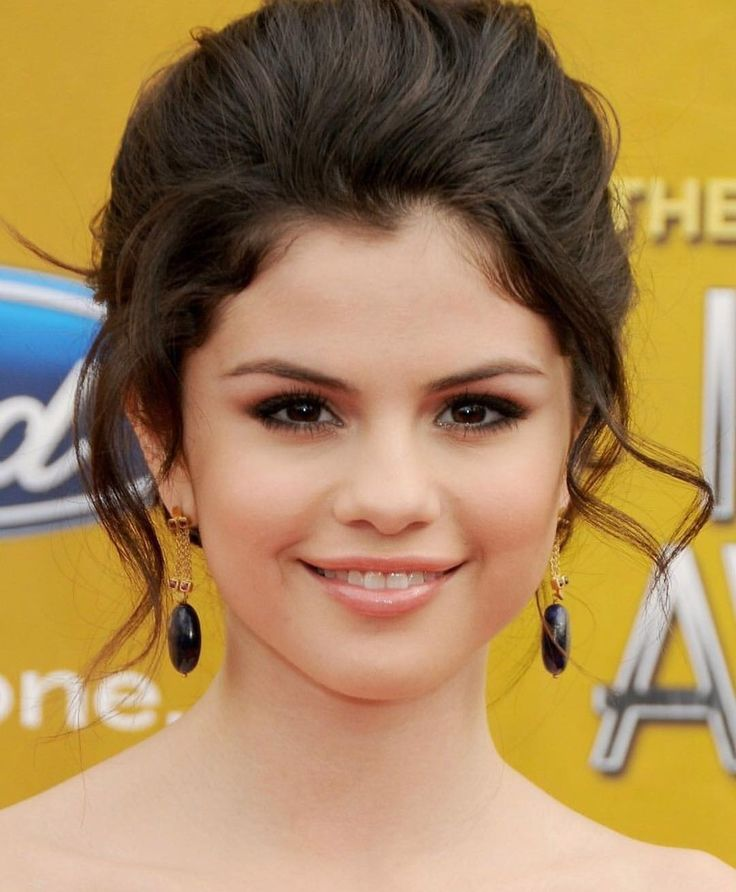

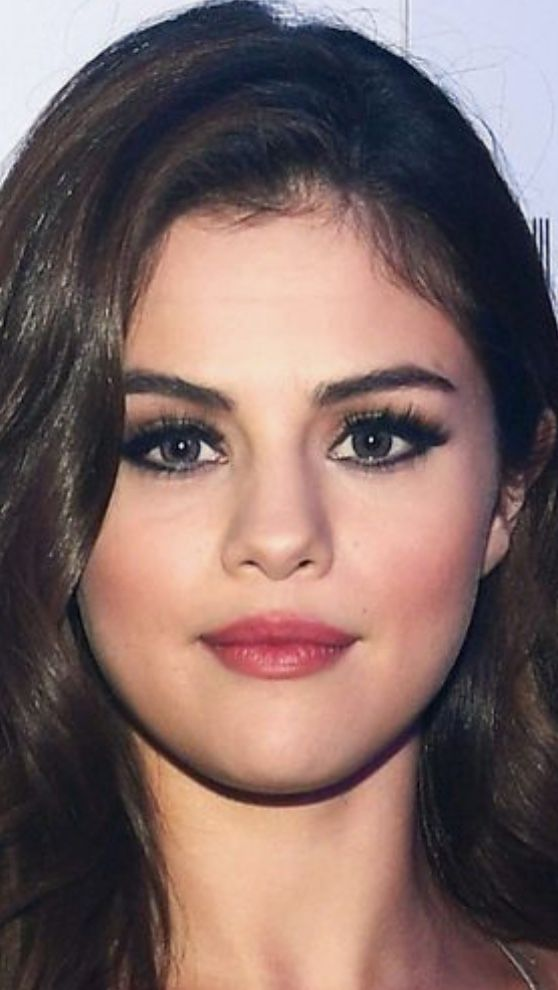

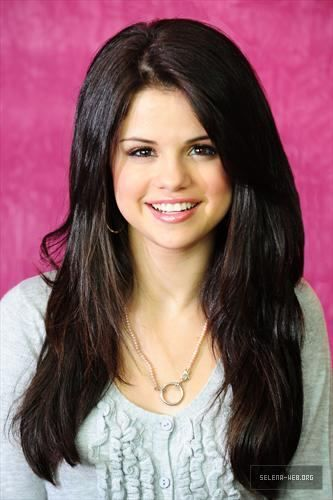

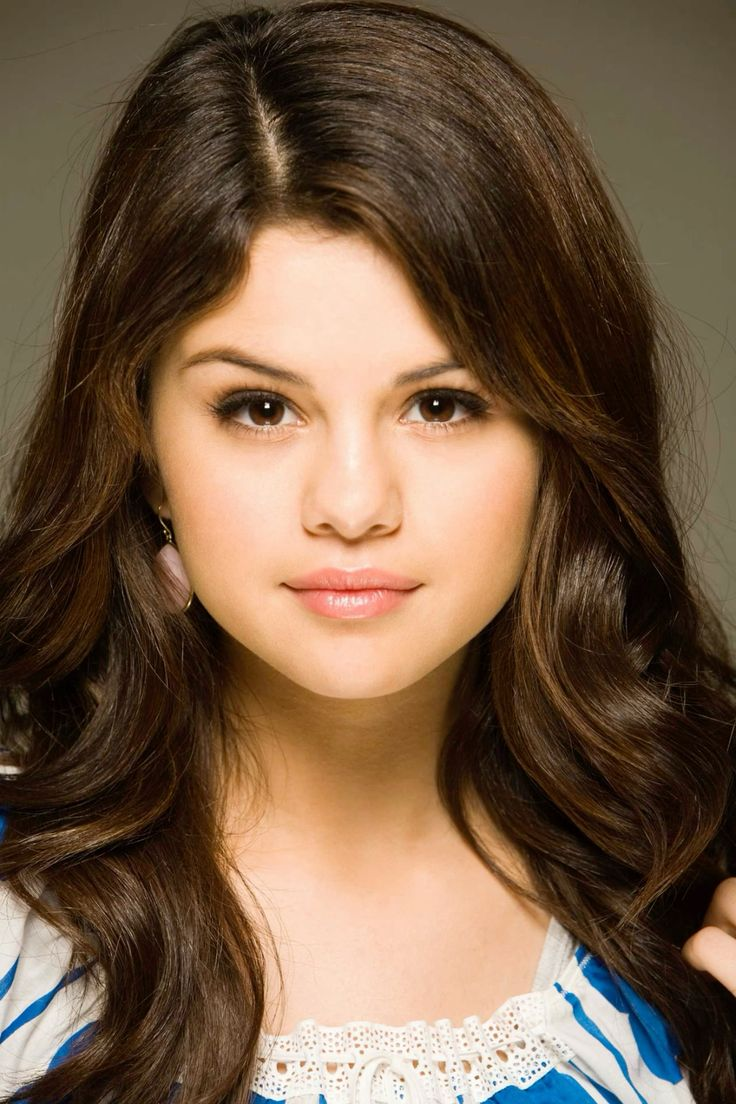

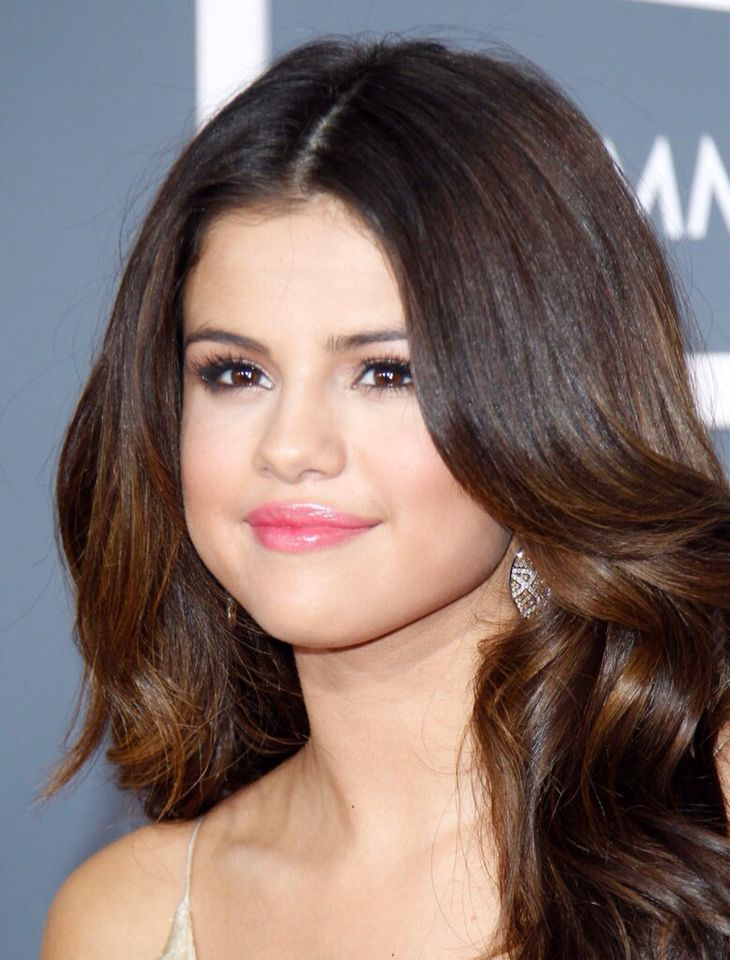

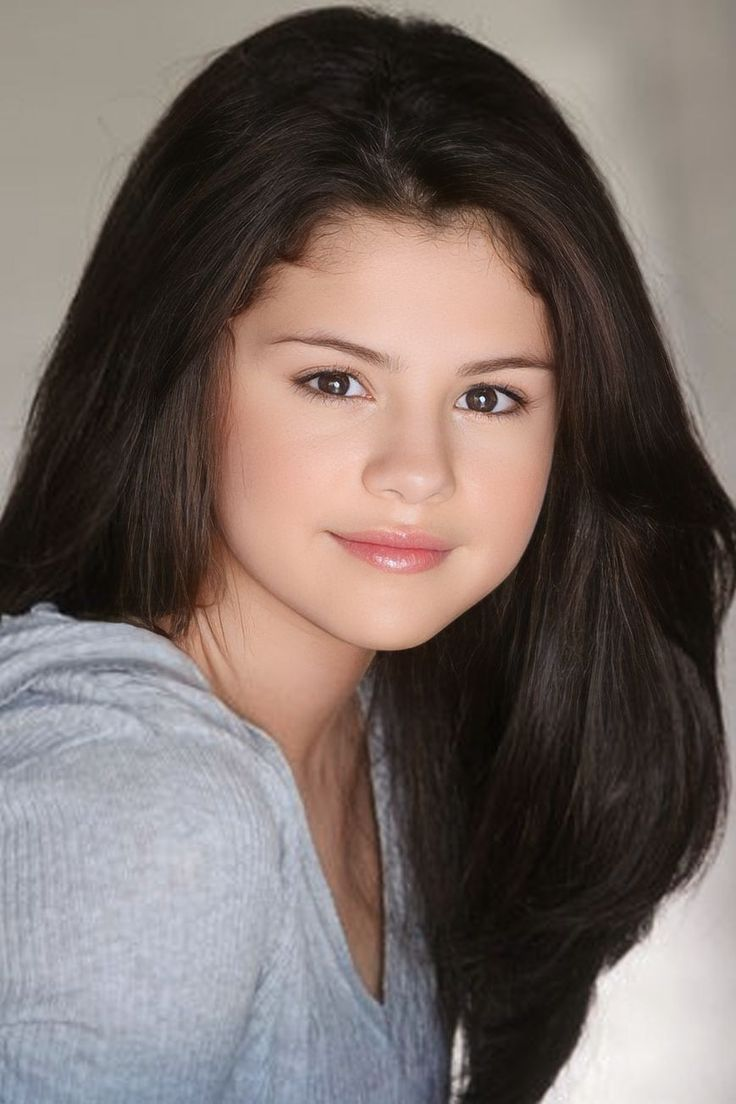

Non-recognized image:


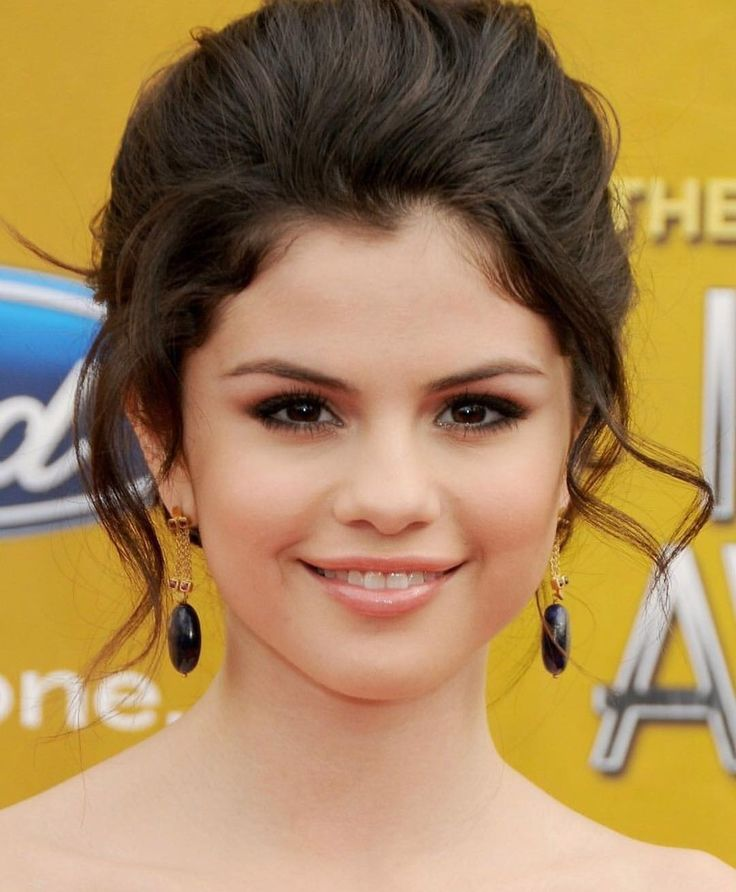

In [51]:
# Display recognized images
if len(dfs) > 0 and not dfs[0].empty:
    print("Recognized images:")
    for path in dfs[0]['identity']:
        img = Image.open(path)
        display(img)  # Display the recognized image
else:
    print("No matching faces found in the database.")

# Display the non-recognized image (always display input image)
print("Non-recognized image:")
display(Image.open(input_image_path))